# Support Vector Machines

As a binary classifier, the perceptron cannot be used to effectively classify linearly inseparable feature representations. We encountered a similar problem to this in our discussion of multiple linear regression  we examined a dataset in which the response variable was not linearly related to the explanatory variables. To improve the accuracy of the model, we introduced a special case of multiple linear regression called polynomial regression. We created synthetic combinations of features, and were able to model a linear relationship between the response variable and the features in the higher-dimensional feature space.

While this method of increasing the dimensions of the feature space may seem like a promising technique to use when approximating nonlinear functions with linear models, it suffers from two related problems. The first is a computational problem; computing the mapped features and working with larger vectors requires more computing power. The second problem pertains to generalization; increasing the dimensions of the feature representation introduces the curse of dimensionality. Learning from high-dimensional feature representations requires exponentially
more training data to avoid overfitting.

## Kernel Trick to Map Data to High Dimensional space

We can assume Kernel as a similarity function which **implicitly** maps the data to an infinite dimension plane and then find the support vectors in that plane and map the vectors back to the original dimension.

The following image shows how adding a third dimension can make the data linearly 'plane' separable.

![example image](http://www.eric-kim.net/eric-kim-net/posts/1/imgs/data_2d_to_3d.png)

The most commonly used kernel is [_**Radial Bias Function**_](https://en.wikipedia.org/wiki/Radial_basis_function)

For complete study of SVM, refer to the blogs.

### Classifying Handwritten digits

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import matplotlib.cm as cm
import pandas as pd

df = pd.read_csv('mnist.csv', header=0)
columns = list(df.columns)
columns = columns[1:] + columns[0:1]
df = df[columns]

In [3]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

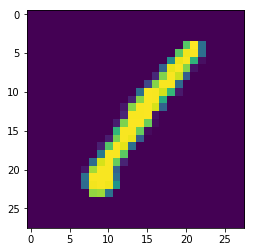

In [4]:
plt.imshow(X.iloc[0].values.reshape(28,-1))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
# from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = SVC(kernel='rbf', gamma=0.01, C=100)


clf.fit(X_train, y_train)

In [8]:
prediction = clf.predict(X_test)

print classification_report(y_test, prediction)

             precision    recall  f1-score   support

          0       0.99      0.88      0.93      1052
          1       0.99      0.97      0.98      1189
          2       0.41      0.99      0.58      1047
          3       0.96      0.74      0.84      1056
          4       0.97      0.80      0.88      1014
          5       0.96      0.79      0.87       929
          6       0.99      0.78      0.87      1064
          7       0.97      0.76      0.85      1100
          8       0.97      0.78      0.87       996
          9       0.96      0.85      0.90      1053

avg / total       0.92      0.84      0.86     10500

